# CyAN Cyanobacteria Index (CI_cyano) - 3

In [4]:
import os
os.chdir('./')
os.getcwd()

'/Users/shangchao/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/Algal_Data'

## Apply 0.001 threshold to monthly and seasonal CI_cyano

In [5]:
pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 5.7 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import rasterio
import numpy as np

# Define input folders
input_folders = [
    "Algal_Data/algal_monthly_spatial",
    "Algal_Data/algal_seasonal_spatial"
]

# Define corresponding output folders
output_folders = [
    "Algal_Data/thresholded_output/algal_monthly_spatial",
    "Algal_Data/thresholded_output/algal_seasonal_spatial"
]

# Ensure all output folders exist
for folder in output_folders:
    os.makedirs(folder, exist_ok=True)

# Define the threshold value
threshold = 0.001

# Process each input folder
for input_folder, output_folder in zip(input_folders, output_folders):
    # Process all TIFF files in the current folder
    for file in os.listdir(input_folder):
        if file.endswith(".tif"):  # Ensure we only process GeoTIFF files
            input_path = os.path.join(input_folder, file)
            output_path = os.path.join(output_folder, file)  # Save with the same filename in the output folder

            # Open the GeoTIFF file
            with rasterio.open(input_path) as src:
                # Read the first band
                data = src.read(1)
                meta = src.meta  # Metadata for writing output

                # Apply the threshold (set values below threshold to NaN or 0)
                thresholded_data = np.where(data > threshold, data, np.nan)

                # Update metadata for output file
                meta.update(dtype="float32", nodata=np.nan)

                # Write the thresholded data to a new GeoTIFF
                with rasterio.open(output_path, "w", **meta) as dst:
                    dst.write(thresholded_data.astype("float32"), 1)

            print(f"Processed: {input_path} -> {output_path}")

print("Thresholding complete for all files.")

FileNotFoundError: [Errno 2] No such file or directory: 'Algal_Data/algal_monthly_spatial'

### Visualize individual map

In [7]:
pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 10.6 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.2
    Uninstalling matplotlib-3.8.2:
      Successfully uninstalled matplotlib-3.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 1.0.3 requires matplotlib==3.7.2, but you have matplotlib 3.9.2 which is incompatible.
d2l 1.0.3 requires numpy==1.23.5, but you have numpy 1.26.4 which is incompatible.
d2l 1.0.3 requires pandas==2.0.3, but you have pa

In [13]:
import rasterio
import numpy as np

file_path = "thresholded_output/algal_monthly_spatial/monthly_avg_2016-08.tif"

# Open the GeoTIFF file
with rasterio.open(file_path) as src:
    data = src.read(1)  # Read the first band
    print(f"Data shape: {data.shape}")
    print(f"Min value: {np.nanmin(data)}")
    print(f"Max value: {np.nanmax(data)}")
    print(f"Unique values: {np.unique(data)}")

Data shape: (789, 1449)
Min value: 0.0010003026109188795
Max value: 0.03230956569314003
Unique values: [0.0010003  0.00100772 0.00100853 ... 0.03162022 0.03230957        nan]


In [12]:
import rasterio

file_path = "thresholded_output/algal_monthly_spatial/monthly_avg_2016-08.tif"

with rasterio.open(file_path) as src:
    print(f"CRS: {src.crs}")  # Print the CRS
    print(f"Bounds: {src.bounds}")  # Print the geographic bounds

CRS: EPSG:4326
Bounds: BoundingBox(left=-83.5139510628177, bottom=41.00657596279326, right=-78.80098158539533, top=43.57285126830481)


In [17]:
pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 17.4 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


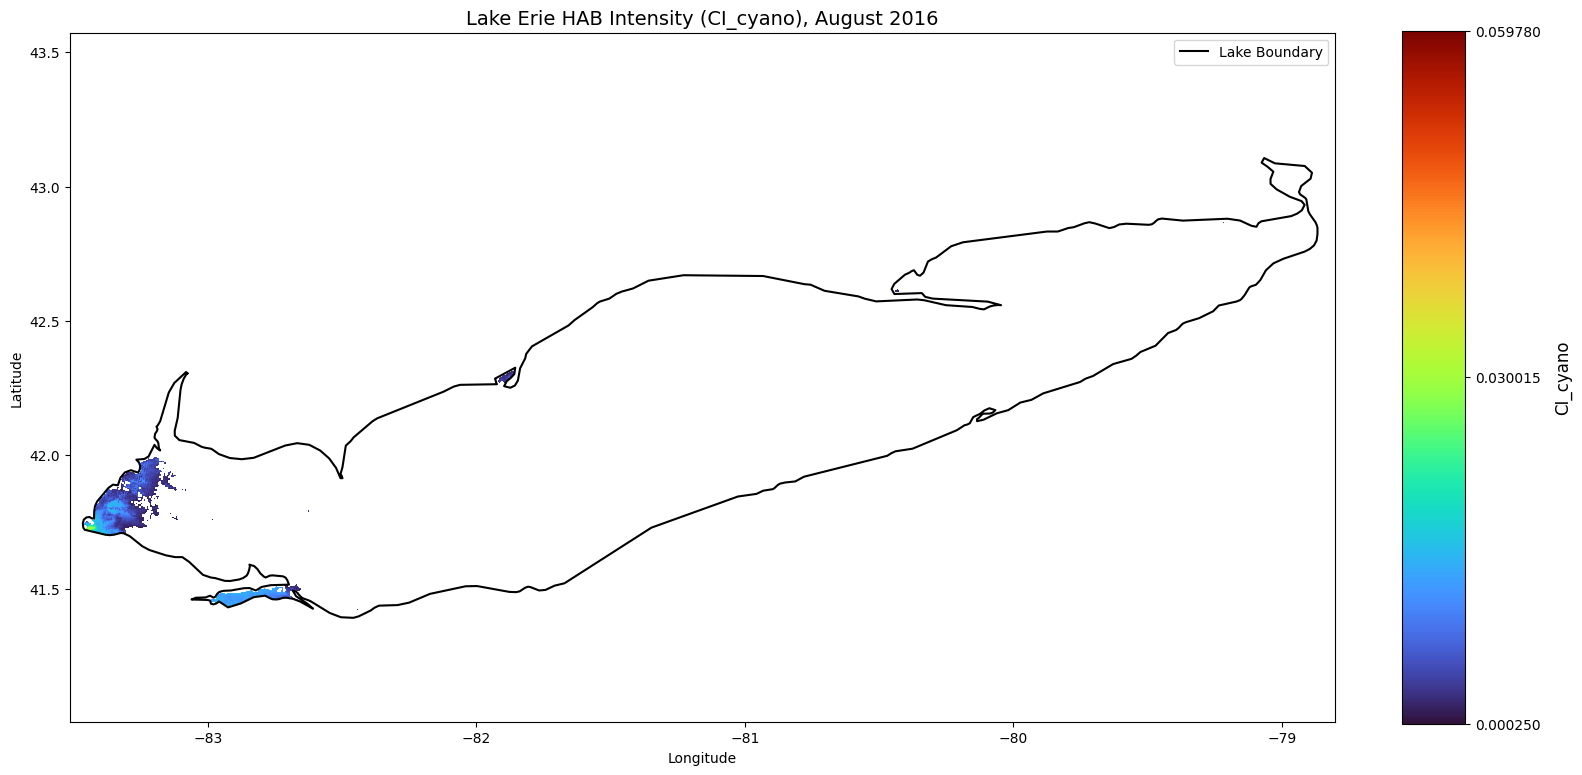

In [21]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from shapely.geometry import shape
import fiona

# Path to the raster file
file_path = "thresholded_output/algal_monthly_spatial/monthly_avg_2016-08.tif"

# Path to the Lake Erie shapefile
lake_shapefile = "/Users/shangchao/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/Lakes_Boundary/ne_10m_lakes.shp"

# Open the raster file
with rasterio.open(file_path) as src:
    image = src.read(1)  # Read the first band
    extent = src.bounds  # Get raster bounds for plotting
    raster_crs = src.crs  # Get CRS of the raster file

# Set `0` values to `NaN` to exclude them from the plot
image = np.where(image == 0, np.nan, image)

# Define the color bar range
vmin, vmax = 0.0002504, 0.05978

# Read the Lake Erie boundary from the shapefile using Fiona
lake_erie_boundary = None
with fiona.open(lake_shapefile) as lakes:
    for lake in lakes:
        if lake['properties']['name'] == 'Lake Erie':  # Match the 'name' field to Lake Erie
            lake_erie_boundary = shape(lake['geometry'])
            break

# Check if Lake Erie boundary was found
if lake_erie_boundary is None:
    raise ValueError("Lake Erie boundary not found in the shapefile.")

# Define the colormap
cmap = plt.cm.turbo

# Create a figure with GridSpec for layout control
fig = plt.figure(figsize=(18, 9))
gs = GridSpec(1, 2, width_ratios=[1, 0.05])  # Add space for the vertical color bar

# Plot the raster
ax = fig.add_subplot(gs[0, 0])
im = ax.imshow(
    image, cmap=cmap, extent=[extent.left, extent.right, extent.bottom, extent.top],
    origin="upper", vmin=vmin, vmax=vmax  # Set the color bar range
)
ax.set_title('Lake Erie HAB Intensity (CI_cyano), August 2016', fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Overlay Lake Erie boundary
x, y = lake_erie_boundary.exterior.xy  # Extract boundary coordinates
ax.plot(x, y, color='black', linewidth=1.5, label='Lake Boundary')
ax.legend(loc='upper right', fontsize=10)

# Add the color bar on the right
cbar_ax = fig.add_subplot(gs[0, 1])  # Space for the color bar
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
cbar.ax.set_ylabel('CI_cyano', fontsize=12, labelpad=10)

# Add ticks to match the range
cbar.set_ticks([vmin, (vmin + vmax) / 2, vmax])  # Ticks at min, midpoint, and max
cbar.ax.set_yticklabels([f"{vmin:.6f}", f"{((vmin + vmax) / 2):.6f}", f"{vmax:.6f}"], fontsize=10)

# Adjust layout to tighten spacing
plt.subplots_adjust(wspace=0.1)

plt.show()

/var/folders/4y/s301rczx2bd2h_0z1dqcxdtm0000gn/T/ipykernel_10549/2241249897.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


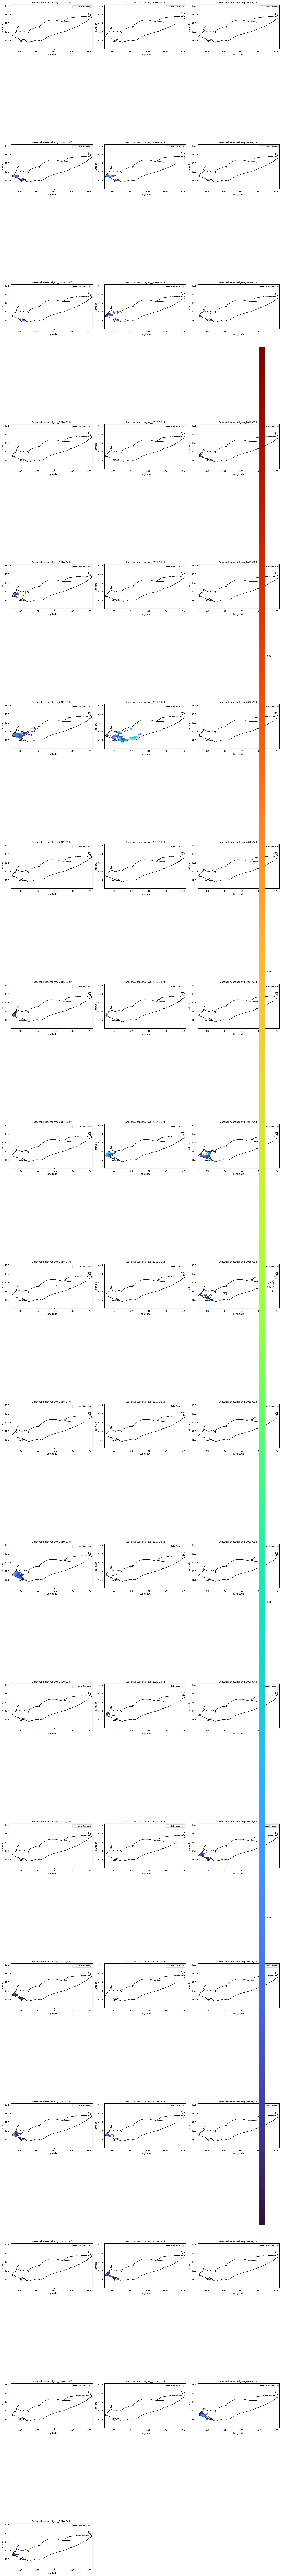

In [28]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from shapely.geometry import shape
import fiona

# Directory containing thresholded GeoTIFF files
folder_path = "thresholded_output/algal_seasonal_spatial"

# Path to the Lake Erie shapefile
lake_shapefile = "../Lakes_Boundary/ne_10m_lakes.shp"

# Define the color bar range
vmin, vmax = 0.0002504, 0.05978

# Define the colormap
cmap = plt.cm.turbo

# Read the Lake Erie boundary from the shapefile using Fiona
lake_erie_boundary = None
with fiona.open(lake_shapefile) as lakes:
    for lake in lakes:
        if lake['properties']['name'] == 'Lake Erie':  # Match the 'name' field to Lake Erie
            lake_erie_boundary = shape(lake['geometry'])
            break

# Check if Lake Erie boundary was found
if lake_erie_boundary is None:
    raise ValueError("Lake Erie boundary not found in the shapefile.")

# Get list of all .tif files in the folder
tif_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".tif")])

# Calculate the number of rows needed (3 columns per row)
n_cols = 3
n_rows = int(np.ceil(len(tif_files) / n_cols))

# Create the figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 9 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each .tif file and plot it
for idx, file in enumerate(tif_files):
    file_path = os.path.join(folder_path, file)
    
    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band
        extent = src.bounds  # Get raster bounds for plotting

    # Set `0` values to `NaN` to exclude them from the plot
    image = np.where(image == 0, np.nan, image)

    # Plot the raster in the corresponding subplot
    ax = axes[idx]
    im = ax.imshow(
        image, cmap=cmap, extent=[extent.left, extent.right, extent.bottom, extent.top],
        origin="upper", vmin=vmin, vmax=vmax  # Set the color bar range
    )
    ax.set_title(f'Seasonal: {file}', fontsize=10)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Overlay Lake Erie boundary
    x, y = lake_erie_boundary.exterior.xy  # Extract boundary coordinates
    ax.plot(x, y, color='black', linewidth=1.5, label='Lake Boundary')
    ax.legend(loc='upper right', fontsize=8)

# Hide any unused subplots
for ax in axes[len(tif_files):]:
    ax.set_visible(False)

# Add the color bar to the right of the figure
fig.subplots_adjust(right=0.9)  # Adjust right boundary for color bar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Color bar location and size
fig.colorbar(im, cax=cbar_ax).set_label('CI_cyano', fontsize=12)

# Adjust layout to tighten spacing
plt.tight_layout()
plt.show()

In [29]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from shapely.geometry import shape
import fiona

# Directory containing thresholded GeoTIFF files
folder_path = "thresholded_output/algal_monthly_spatial"

# Path to the Lake Erie shapefile
lake_shapefile = "../Lakes_Boundary/ne_10m_lakes.shp"

# Define the color bar range
vmin, vmax = 0.0002504, 0.05978

# Define the colormap
cmap = plt.cm.turbo

# Read the Lake Erie boundary from the shapefile using Fiona
lake_erie_boundary = None
with fiona.open(lake_shapefile) as lakes:
    for lake in lakes:
        if lake['properties']['name'] == 'Lake Erie':  # Match the 'name' field to Lake Erie
            lake_erie_boundary = shape(lake['geometry'])
            break

# Check if Lake Erie boundary was found
if lake_erie_boundary is None:
    raise ValueError("Lake Erie boundary not found in the shapefile.")

# Get list of all .tif files in the folder
tif_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".tif")])

# Calculate the number of rows needed (3 columns per row)
n_cols = 3
n_rows = int(np.ceil(len(tif_files) / n_cols))

# Create the figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 9 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each .tif file and plot it
for idx, file in enumerate(tif_files):
    file_path = os.path.join(folder_path, file)
    
    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band
        extent = src.bounds  # Get raster bounds for plotting

    # Set `0` values to `NaN` to exclude them from the plot
    image = np.where(image == 0, np.nan, image)

    # Plot the raster in the corresponding subplot
    ax = axes[idx]
    im = ax.imshow(
        image, cmap=cmap, extent=[extent.left, extent.right, extent.bottom, extent.top],
        origin="upper", vmin=vmin, vmax=vmax  # Set the color bar range
    )
    ax.set_title(f'Seasonal: {file}', fontsize=10)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Overlay Lake Erie boundary
    x, y = lake_erie_boundary.exterior.xy  # Extract boundary coordinates
    ax.plot(x, y, color='black', linewidth=1.5, label='Lake Boundary')
    ax.legend(loc='upper right', fontsize=8)

# Hide any unused subplots
for ax in axes[len(tif_files):]:
    ax.set_visible(False)

# Add the color bar to the right of the figure
fig.subplots_adjust(right=0.9)  # Adjust right boundary for color bar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Color bar location and size
fig.colorbar(im, cax=cbar_ax).set_label('CI_cyano', fontsize=12)

# Adjust layout to tighten spacing
plt.tight_layout()
plt.show()

/var/folders/4y/s301rczx2bd2h_0z1dqcxdtm0000gn/T/ipykernel_10549/3768877172.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [1]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from shapely.geometry import shape
import fiona

# Directory containing thresholded GeoTIFF files
folder_path = "thresholded_output/algal_monthly_spatial"

# Path to the Lake Erie shapefile
lake_shapefile = "../Lakes_Boundary/ne_10m_lakes.shp"

# Define the color bar range
vmin, vmax = 0.0002504, 0.05978

# Define the colormap
cmap = plt.cm.turbo

# Read the Lake Erie boundary from the shapefile using Fiona
lake_erie_boundary = None
with fiona.open(lake_shapefile) as lakes:
    for lake in lakes:
        if lake['properties']['name'] == 'Lake Erie':  # Match the 'name' field to Lake Erie
            lake_erie_boundary = shape(lake['geometry'])
            break

# Check if Lake Erie boundary was found
if lake_erie_boundary is None:
    raise ValueError("Lake Erie boundary not found in the shapefile.")

# Get list of all .tif files in the folder
tif_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".tif")])

# Filter the files to include only those with valid data
valid_files = []
for file in tif_files:
    file_path = os.path.join(folder_path, file)
    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band
        if np.any(image > 0):  # Check if there are any non-zero values
            valid_files.append(file)

# Calculate the number of rows needed (3 columns per row)
n_cols = 3
n_rows = int(np.ceil(len(valid_files) / n_cols))

# Create the figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 9 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each valid .tif file and plot it
for idx, file in enumerate(valid_files):
    file_path = os.path.join(folder_path, file)
    
    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band
        extent = src.bounds  # Get raster bounds for plotting

    # Set `0` values to `NaN` to exclude them from the plot
    image = np.where(image == 0, np.nan, image)

    # Plot the raster in the corresponding subplot
    ax = axes[idx]
    im = ax.imshow(
        image, cmap=cmap, extent=[extent.left, extent.right, extent.bottom, extent.top],
        origin="upper", vmin=vmin, vmax=vmax  # Set the color bar range
    )
    ax.set_title(f'Seasonal: {file}', fontsize=10)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Overlay Lake Erie boundary
    x, y = lake_erie_boundary.exterior.xy  # Extract boundary coordinates
    ax.plot(x, y, color='black', linewidth=1.5, label='Lake Boundary')
    ax.legend(loc='upper right', fontsize=8)

# Hide any unused subplots
for ax in axes[len(valid_files):]:
    ax.set_visible(False)

# Add the color bar to the right of the figure
fig.subplots_adjust(right=0.9)  # Adjust right boundary for color bar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Color bar location and size
fig.colorbar(im, cax=cbar_ax).set_label('CI_cyano', fontsize=12)

# Adjust layout to tighten spacing
plt.tight_layout()
plt.show()


/var/folders/4y/s301rczx2bd2h_0z1dqcxdtm0000gn/T/ipykernel_14990/2711617425.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


No valid values in monthly_avg_2008-01.tif. Skipping...
No valid values in monthly_avg_2008-02.tif. Skipping...
No valid values in monthly_avg_2009-01.tif. Skipping...
No valid values in monthly_avg_2009-02.tif. Skipping...
No valid values in monthly_avg_2010-12.tif. Skipping...
No valid values in monthly_avg_2011-01.tif. Skipping...
No valid values in monthly_avg_2011-02.tif. Skipping...
No valid values in monthly_avg_2012-02.tif. Skipping...


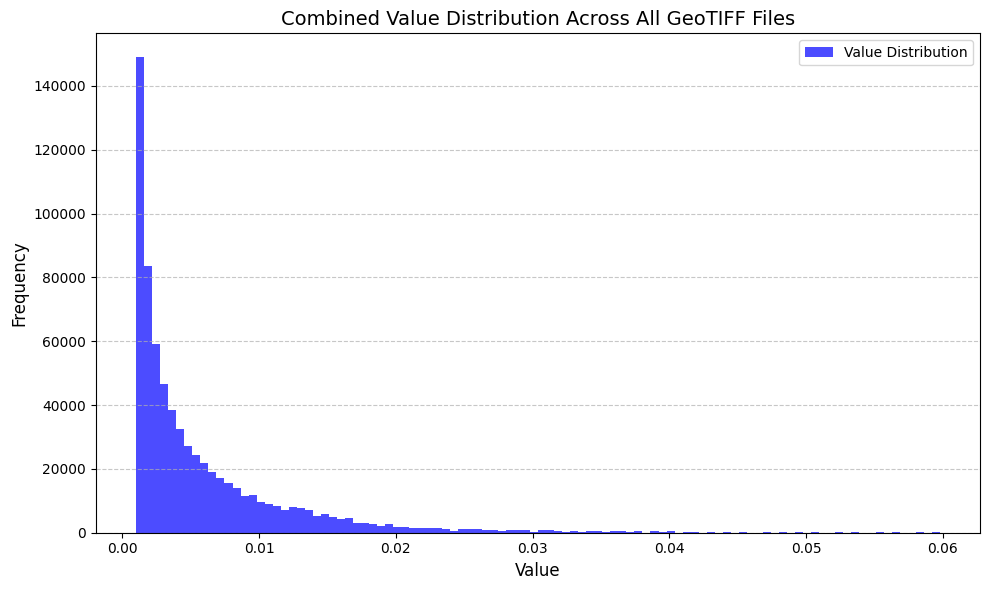

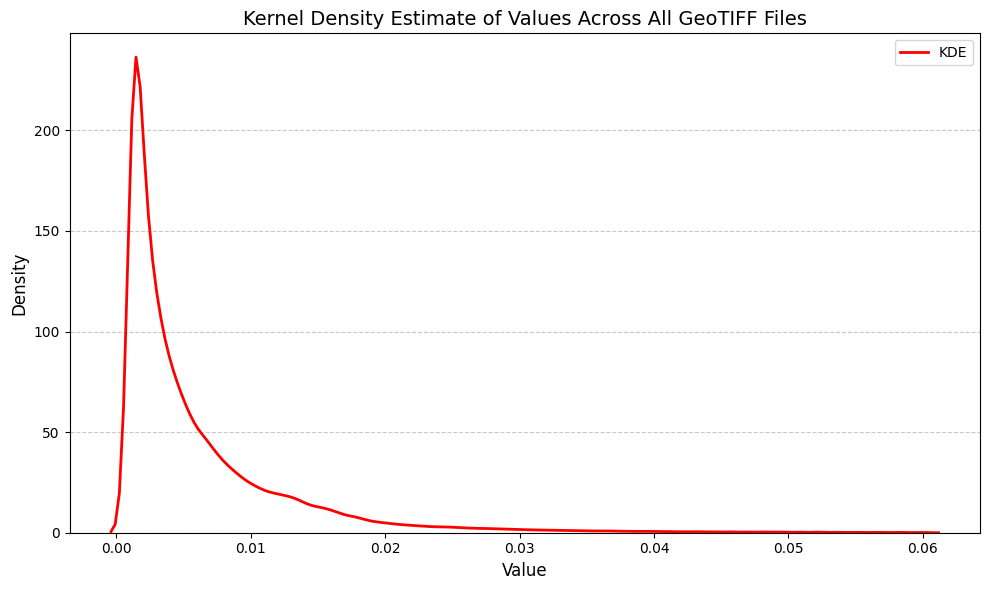

In [3]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Directory containing GeoTIFF files
folder_path = "thresholded_output/algal_monthly_spatial"

# Get list of all .tif files in the folder
tif_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".tif")])

# List to store all valid values from all files
all_valid_values = []

# Loop through each .tif file
for file in tif_files:
    file_path = os.path.join(folder_path, file)
    
    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band

    # Flatten the array and remove zero or NaN values
    valid_values = image[image > 0]
    valid_values = valid_values[~np.isnan(valid_values)]
    
    if len(valid_values) == 0:
        print(f"No valid values in {file}. Skipping...")
        continue
    
    # Append valid values to the combined list
    all_valid_values.extend(valid_values)

# Check if there are any valid values
if len(all_valid_values) == 0:
    raise ValueError("No valid values found across all files.")

# Convert to numpy array for convenience
all_valid_values = np.array(all_valid_values)

# Plot the combined histogram
plt.figure(figsize=(10, 6))
plt.hist(all_valid_values, bins=100, color='blue', alpha=0.7, label='Value Distribution')
plt.title("Combined Value Distribution Across All GeoTIFF Files", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Plot the kernel density estimate (optional, requires seaborn)
try:
    import seaborn as sns
    plt.figure(figsize=(10, 6))
    sns.kdeplot(all_valid_values, color='red', linewidth=2, label='KDE')
    plt.title("Kernel Density Estimate of Values Across All GeoTIFF Files", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Seaborn not installed. KDE plot skipped.")


In [4]:
import os
import numpy as np
import rasterio

# Directory containing GeoTIFF files
folder_path = "thresholded_output/algal_monthly_spatial"

# Get list of all .tif files in the folder
tif_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".tif")])

# Dictionary to store the average value for each file
file_averages = {}

# Loop through each .tif file
for file in tif_files:
    file_path = os.path.join(folder_path, file)
    
    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band

    # Flatten the array and remove zero or NaN values
    valid_values = image[image > 0]
    valid_values = valid_values[~np.isnan(valid_values)]
    
    if len(valid_values) == 0:
        print(f"No valid values in {file}. Skipping...")
        continue
    
    # Calculate the average of valid values
    avg_value = np.mean(valid_values)
    file_averages[file] = avg_value

# Print out the average value for each file
print("Average Values for Each GeoTIFF File:")
for file, avg in file_averages.items():
    print(f"{file}: {avg:.4f}")


No valid values in monthly_avg_2008-01.tif. Skipping...
No valid values in monthly_avg_2008-02.tif. Skipping...
No valid values in monthly_avg_2009-01.tif. Skipping...
No valid values in monthly_avg_2009-02.tif. Skipping...
No valid values in monthly_avg_2010-12.tif. Skipping...
No valid values in monthly_avg_2011-01.tif. Skipping...
No valid values in monthly_avg_2011-02.tif. Skipping...
No valid values in monthly_avg_2012-02.tif. Skipping...
Average Values for Each GeoTIFF File:
monthly_avg_2008-03.tif: 0.0013
monthly_avg_2008-04.tif: 0.0017
monthly_avg_2008-05.tif: 0.0073
monthly_avg_2008-06.tif: 0.0085
monthly_avg_2008-07.tif: 0.0108
monthly_avg_2008-08.tif: 0.0064
monthly_avg_2008-09.tif: 0.0084
monthly_avg_2008-10.tif: 0.0064
monthly_avg_2008-11.tif: 0.0041
monthly_avg_2008-12.tif: 0.0015
monthly_avg_2009-03.tif: 0.0013
monthly_avg_2009-04.tif: 0.0027
monthly_avg_2009-05.tif: 0.0091
monthly_avg_2009-06.tif: 0.0116
monthly_avg_2009-07.tif: 0.0086
monthly_avg_2009-08.tif: 0.0060
mo

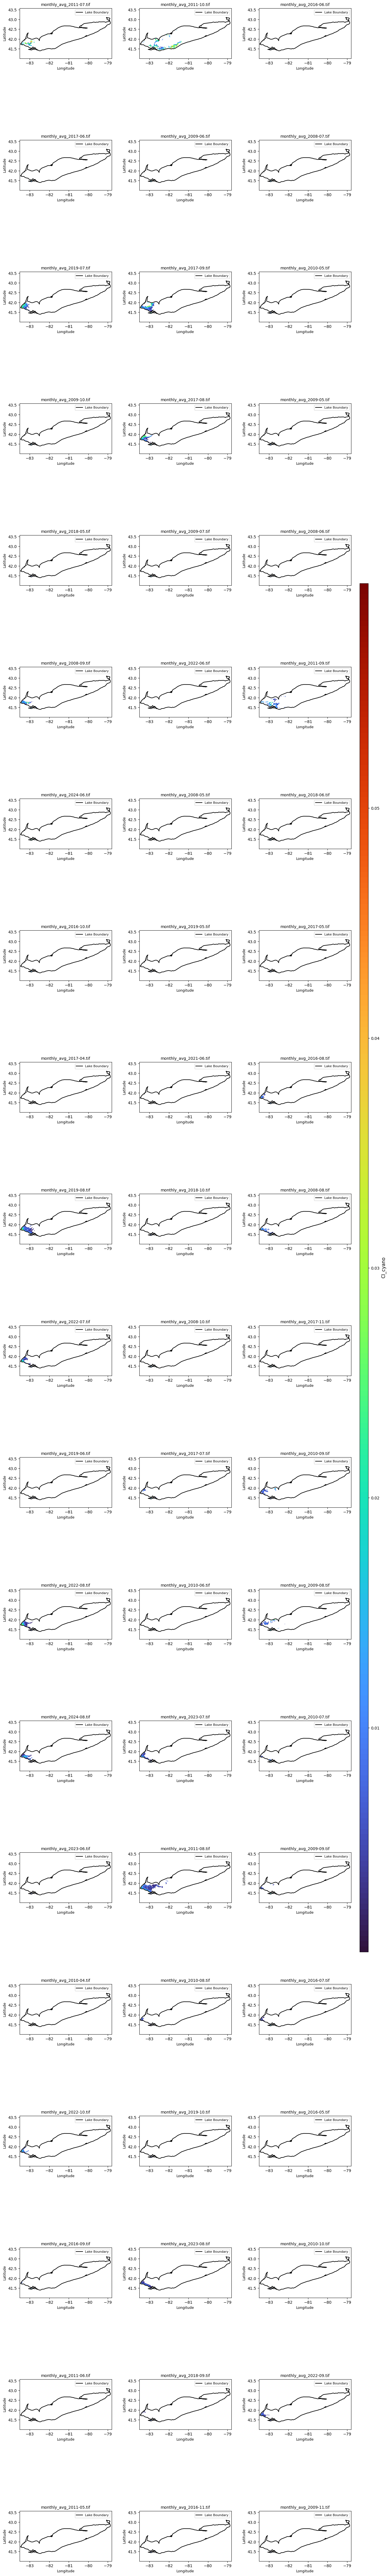

In [17]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import shape
import fiona

# Directory containing thresholded GeoTIFF files
folder_path = "thresholded_output/algal_monthly_spatial"

# Path to the Lake Erie shapefile
lake_shapefile = "../Lakes_Boundary/ne_10m_lakes.shp"

# Define the color bar range
vmin, vmax = 0.0002504, 0.05978

# Define the colormap
cmap = plt.cm.turbo

# Read the Lake Erie boundary from the shapefile using Fiona
lake_erie_boundary = None
with fiona.open(lake_shapefile) as lakes:
    for lake in lakes:
        if lake['properties']['name'] == 'Lake Erie':  # Match the 'name' field to Lake Erie
            lake_erie_boundary = shape(lake['geometry'])
            break

# Check if Lake Erie boundary was found
if lake_erie_boundary is None:
    raise ValueError("Lake Erie boundary not found in the shapefile.")

# Get list of all .tif files in the folder
tif_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".tif")])

# Dictionary to store the average value for each file
file_averages = {}

# Calculate average value for each file
for file in tif_files:
    file_path = os.path.join(folder_path, file)
    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band

    # Flatten the array and remove zero or NaN values
    valid_values = image[image > 0]
    valid_values = valid_values[~np.isnan(valid_values)]

    if len(valid_values) == 0:
        continue  # Skip files with no valid data
    
    # Calculate the average value
    avg_value = np.mean(valid_values)
    file_averages[file] = avg_value

# Sort the files by average value in descending order and select the top 10
top_files = sorted(file_averages.items(), key=lambda x: x[1], reverse=True)[:60]

# Extract only the file names
top_file_names = [item[0] for item in top_files]

# Calculate the number of rows needed (3 columns per row)
n_cols = 3
n_rows = int(np.ceil(len(top_file_names) / n_cols))

# Create the figure and axes
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(15, 6 * n_rows),
    gridspec_kw={'hspace': 0.0, 'wspace': 0.3}  # Tighter spacing
)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each top file and plot it
for idx, file in enumerate(top_file_names):
    file_path = os.path.join(folder_path, file)
    
    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band
        extent = src.bounds  # Get raster bounds for plotting

    # Set `0` values to `NaN` to exclude them from the plot
    image = np.where(image == 0, np.nan, image)

    # Plot the raster in the corresponding subplot
    ax = axes[idx]
    im = ax.imshow(
        image, cmap=cmap, extent=[extent.left, extent.right, extent.bottom, extent.top],
        origin="upper", vmin=vmin, vmax=vmax  # Set the color bar range
    )
    ax.set_title(f'{file}', fontsize=10)
    ax.set_xlabel("Longitude", fontsize=9)
    ax.set_ylabel("Latitude", fontsize=9)

    # Overlay Lake Erie boundary
    x, y = lake_erie_boundary.exterior.xy  # Extract boundary coordinates
    ax.plot(x, y, color='black', linewidth=1.5, label='Lake Boundary')
    ax.legend(loc='upper right', fontsize=8)

# Hide any unused subplots
for ax in axes[len(top_file_names):]:
    ax.set_visible(False)

# Add the color bar outside the figure
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Adjust color bar position
fig.colorbar(im, cax=cbar_ax).set_label('CI_cyano', fontsize=12)

# Show the plot
plt.show()

